In [73]:
import pickle
import polars as pl
import numpy as np
from matplotlib import pyplot as plt

dfs = pickle.load(open(f"join0.2leave0.4.p", "rb"))

nr_frames = pl.max(dfs['frame'])
nr_reds = np.zeros(nr_frames)
nr_blues = np.zeros(nr_frames)
nr_total_individuals = pl.max(dfs['id'])+1

for frame in range(max(dfs["frame"])):
    indiv = dfs[["id","x","y","image_index"]][dfs["frame"]==frame].to_numpy()
    for i,ind in enumerate(indiv):
        if ind[-1] == 1:
            nr_reds[frame] += 1
        elif ind[-1] == 2:
            nr_blues[frame] += 1

nr_neutral = np.asarray([nr_total_individuals]*nr_frames-nr_reds-nr_blues)/50
nr_reds = nr_reds/50
nr_blues = nr_blues/50

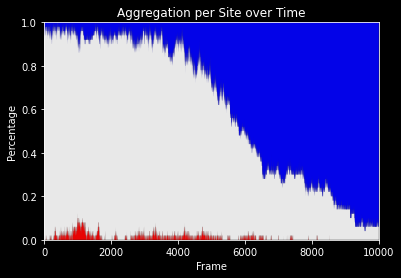

In [36]:
plt.style.use("dark_background")

fig, ax = plt.subplots()

fig = plt.stackplot(range(nr_frames),
              [nr_reds,nr_neutral,nr_blues],
              labels=['reds', 'neutral', 'blue'],
              colors=['red','white','blue'],
              alpha=.9)

ax.set_xlim([0,10000])
ax.set_ylim([0,1])

ax.set_title("Aggregation per Site over Time")
# ax.set_ylabel("Percentahe of birds in a flock")
ax.set_xlabel("Frame")
ax.set_ylabel('Percentage')
# plt.legend(['0.0','0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9'])

ax.set_facecolor("#202020")

In [38]:
def get_blue_white_red_proportions(p_join,p_leave):
    dfs = pickle.load(open(f"join{p_join:.1f}leave{p_leave:.1f}.p", "rb"))
    nr_frames = pl.max(dfs['frame'])
    nr_reds = np.zeros(nr_frames)
    nr_blues = np.zeros(nr_frames)
    nr_total_individuals = pl.max(dfs['id'])+1

    for frame in range(max(dfs["frame"])):
        indiv = dfs[["id","x","y","image_index"]][dfs["frame"]==frame].to_numpy()
        for i,ind in enumerate(indiv):
            if ind[-1] == 1:
                nr_reds[frame] += 1
            elif ind[-1] == 2:
                nr_blues[frame] += 1

    nr_neutral = np.asarray([nr_total_individuals]*nr_frames-nr_reds-nr_blues)/50
    nr_reds = nr_reds/50
    nr_blues = nr_blues/50

    return nr_reds, nr_neutral, nr_blues

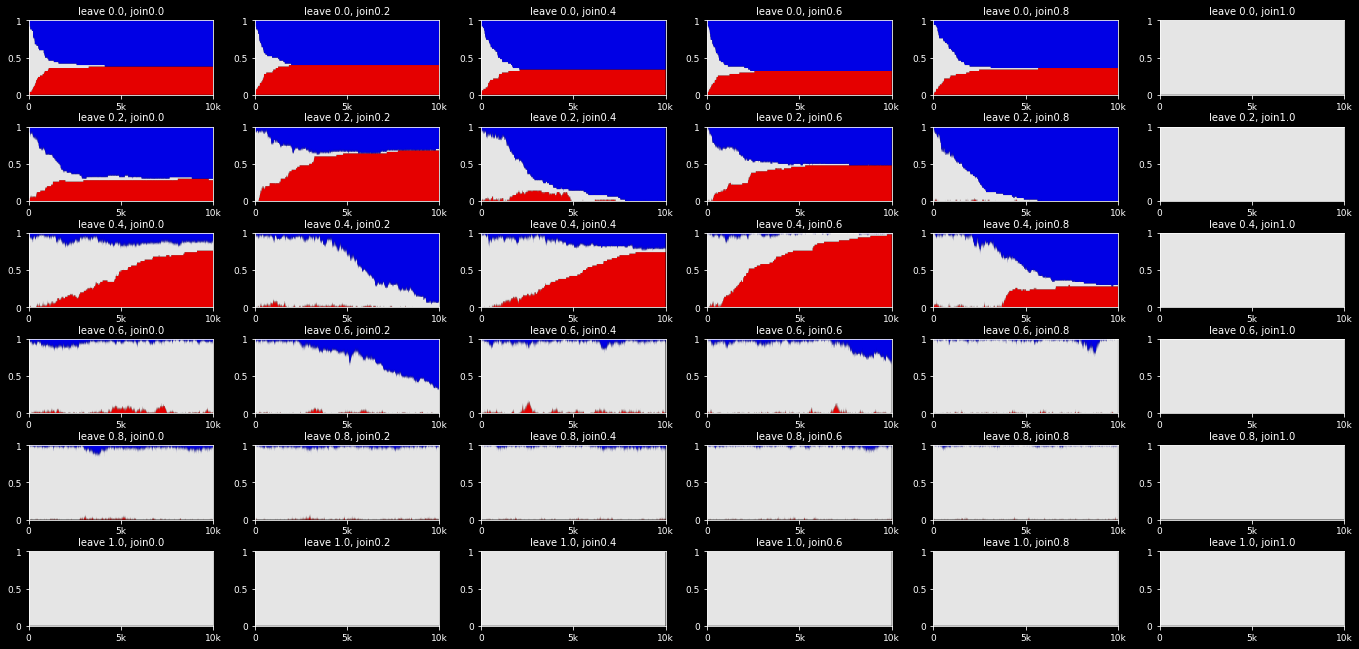

In [117]:
fig_dfo, axs = plt.subplots(6, 6, figsize=(19, 9))
fig_dfo.tight_layout()
for i,experiment_p_join in enumerate(np.linspace(0,1.2,6,endpoint=False)):
      for j,experiment_p_leave in enumerate(np.linspace(0,1.2,6,endpoint=False)):

            nr_reds, nr_neutral, nr_blues = get_blue_white_red_proportions(experiment_p_join,experiment_p_leave)

            axs[j,i].stackplot(range(nr_frames),
                  [nr_reds,nr_neutral,nr_blues],
                  colors=['red','white','blue'],
                  alpha=.9)
            axs[j,i].set_title(f'leave {experiment_p_leave:.1f}, join{experiment_p_join:.1f}',fontsize=10)
            axs[j,i].set_xlim([0,10000])
            axs[j,i].set_ylim([0,1])
            
            axs[j,i].set_xticks([0,5000,10000])
            axs[j,i].set_xticklabels(['0','5k','10k'],fontdict={'fontsize': 9})
            axs[j,i].set_yticks([0,0.5,1])
            axs[j,i].set_yticklabels(['0','0.5','1'],fontdict={'fontsize': 9})



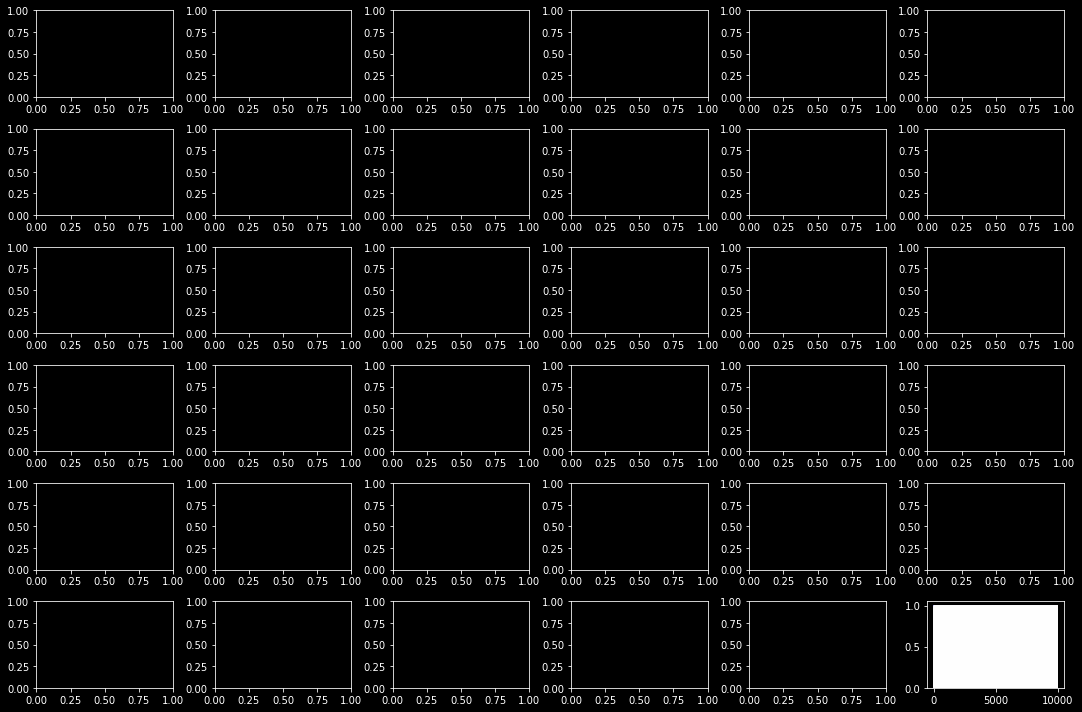

In [45]:
fig_dfo, axs = plt.subplots(6, 6, figsize=(15, 10))
fig_dfo.tight_layout()
for i,experiment_p_join in enumerate(np.linspace(0,1.2,6,endpoint=False)):
    for j,experiment_p_leave in enumerate(np.linspace(0,1.2,6,endpoint=False)):
        
        nr_reds, nr_neutral, nr_blues = get_blue_white_red_proportions(experiment_p_join,experiment_p_leave)

        axs[j,i] = plt.stackplot(range(nr_frames),
              [nr_reds,nr_neutral,nr_blues],
              colors=['red','white','blue'],
              alpha=.9)
        
        # axs[j,i].set_xlim([0,10000])
        # axs[j,i].set_ylim([0,1])  
        # axs[j,i].set_title("Aggregation per Site over Time")
        # axs[j,i].set_xlabel("Frame")
        # axs[j,i].set_ylabel('Percentage')
        
